#### Step 1: Import Packages.

In [1]:

# package for analysis

import pandas as pd
import numpy as np
from sklearn import svm

# package for visuals

import matplotlib.pyplot as plt
import seaborn as sns

# allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

#### Step 2: Import Data.

In [2]:

# Read in muffin and cupcake ingredient data

recipes = pd.read_csv("recipes_muffins_cupcakes.csv")
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


#### Step 3: Prepare the Data (Pre-Processing).

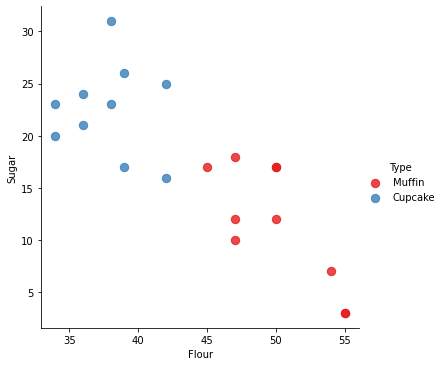

In [49]:

# Plot two ingredients

sns.lmplot(x='Flour',y='Sugar',data=recipes,hue='Type',
          palette='Set1',fit_reg=False,scatter_kws={"s":70})

In [42]:

# Specify inputs for the model.
ingredients = recipes[['Flour','Sugar']].values
type_label = np.where(recipes['Type']=='Muffin',0,1)
print('ingridents:\n',ingredients)
print('\ntype_label:\n',type_label)
# Feature names
recipe_features = recipes.columns.values[1:].tolist()
print('\nfeature names:\n',recipe_features)

ingridents:
 [[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]

type_label:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]

feature names:
 ['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


#### Step 4. Fit the model.

In [43]:

# Fit the SVM model.

mdl = svm.SVC(kernel='linear')
mdl.fit(ingredients,type_label)

SVC(kernel='linear')

#### Step 5. Visualize Results.

In [44]:

# Get the separating hyperplane.

w = mdl.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx-(mdl.intercept_[0])/w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors.
b = mdl.support_vectors_[0]
yy_down = a*xx+(b[1]-a*b[0])
b = mdl.support_vectors_[-1]
yy_up = a*xx+(b[1]-a*b[0])

In [47]:
print(w)
print(a)
print(xx)

[-6.66503014e-01 -7.77156117e-16]
-857617921181270.0
[30.         30.6122449  31.2244898  31.83673469 32.44897959 33.06122449
 33.67346939 34.28571429 34.89795918 35.51020408 36.12244898 36.73469388
 37.34693878 37.95918367 38.57142857 39.18367347 39.79591837 40.40816327
 41.02040816 41.63265306 42.24489796 42.85714286 43.46938776 44.08163265
 44.69387755 45.30612245 45.91836735 46.53061224 47.14285714 47.75510204
 48.36734694 48.97959184 49.59183673 50.20408163 50.81632653 51.42857143
 52.04081633 52.65306122 53.26530612 53.87755102 54.48979592 55.10204082
 55.71428571 56.32653061 56.93877551 57.55102041 58.16326531 58.7755102
 59.3877551  60.        ]


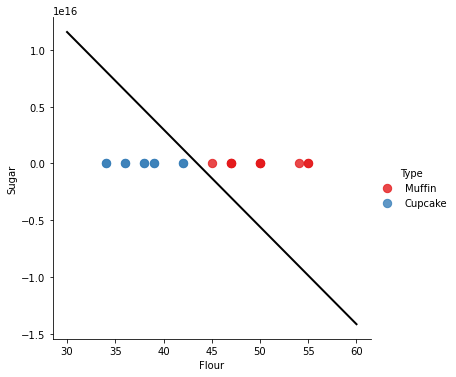

In [48]:
# Plot the hyperplane
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

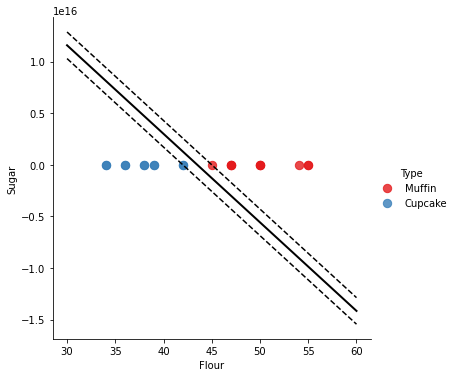

In [51]:
# Look at the margins and support vectors
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(mdl.support_vectors_[:, 0], mdl.support_vectors_[:, 1],
            s=80, facecolors='none')

#### Step 6: Predict New Case.

In [57]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(mdl.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [62]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(75, 20)

You're looking at a muffin recipe!


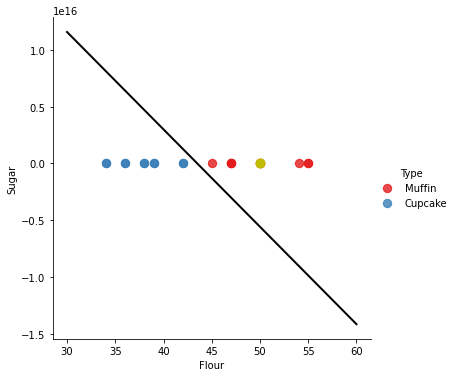

In [66]:
# Plot the point to visually see where the point lies
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [68]:
muffin_cupcake_dict = {'muffin_cupcake_model': mdl, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [69]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [70]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [71]:
# S = String
pickle.dumps(muffin_cupcake_dict)

b'\x80\x04\x95b\x05\x00\x00\x00\x00\x00\x00}\x94(\x8c\x14muffin_cupcake_model\x94\x8c\x14sklearn.svm._classes\x94\x8c\x03SVC\x94\x93\x94)\x81\x94}\x94(\x8c\x17decision_function_shape\x94\x8c\x03ovr\x94\x8c\nbreak_ties\x94\x89\x8c\x06kernel\x94\x8c\x06linear\x94\x8c\x06degree\x94K\x03\x8c\x05gamma\x94\x8c\x05scale\x94\x8c\x05coef0\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x03tol\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x02nu\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x07epsilon\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tshrinking\x94\x88\x8c\x0bprobability\x94\x89\x8c\ncache_size\x94K\xc8\x8c\x0cclass_weight\x94N\x8c\x07verbose\x94\x89\x8c\x08max_iter\x94J\xff\xff\xff\xff\x8c\x0crandom_state\x94N\x8c\x07_sparse\x94\x89\x8c\x0en_features_in_\x94K\x02\x8c\rclass_weight_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h!\x8c\x05dtype\x94\x93\x94\